In [70]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import mean_squared_error

# 1. Eigenvalues and Eigenvectors

In [71]:
# (4) Using np.linalg.eig, compute the eigenvalues and eigenvectors of A
# print your results [print()]
# TODO

# Define a matrix
matrix = np.array([[9, 1, -1], [-1, 11, 1], [-2, 2, 10]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [12.  8. 10.]
Eigenvectors:
 [[ 9.00258517e-16 -7.07106781e-01 -7.07106781e-01]
 [-7.07106781e-01 -3.36518470e-16 -7.07106781e-01]
 [-7.07106781e-01 -7.07106781e-01 -5.62025848e-15]]


# 2. Principal Component analysis and eigenfaces

In [72]:
dataset = fetch_olivetti_faces() # Load the Olivetti faces dataset from sklearn.datasets

In [73]:
persons_faces = [] # Create a list to store the faces of each person
for i in range(40): # For each person in the dataset
    faces = [] # Create a list to store the faces of the person
    for j in range(10): # For each face of the person
        faces += [dataset.images[i*10+j]] # Add the face to the list
    persons_faces += [faces] # Add the list of faces to the list of persons

database = [faces[:-1] for faces in persons_faces[:36]] # Create a database of faces for the first 36 persons
test_faces = [faces[-1] for faces in persons_faces[:36]] # Create a list of faces for the first 36 persons to test the algorithm
people_not_in_database = [face for faces in persons_faces[36:] for face in faces] # Create a list of faces for the last 4 persons to test the algorithm

In [74]:
database_array = np.array(database)
print(database_array.shape)


(36, 9, 64, 64)


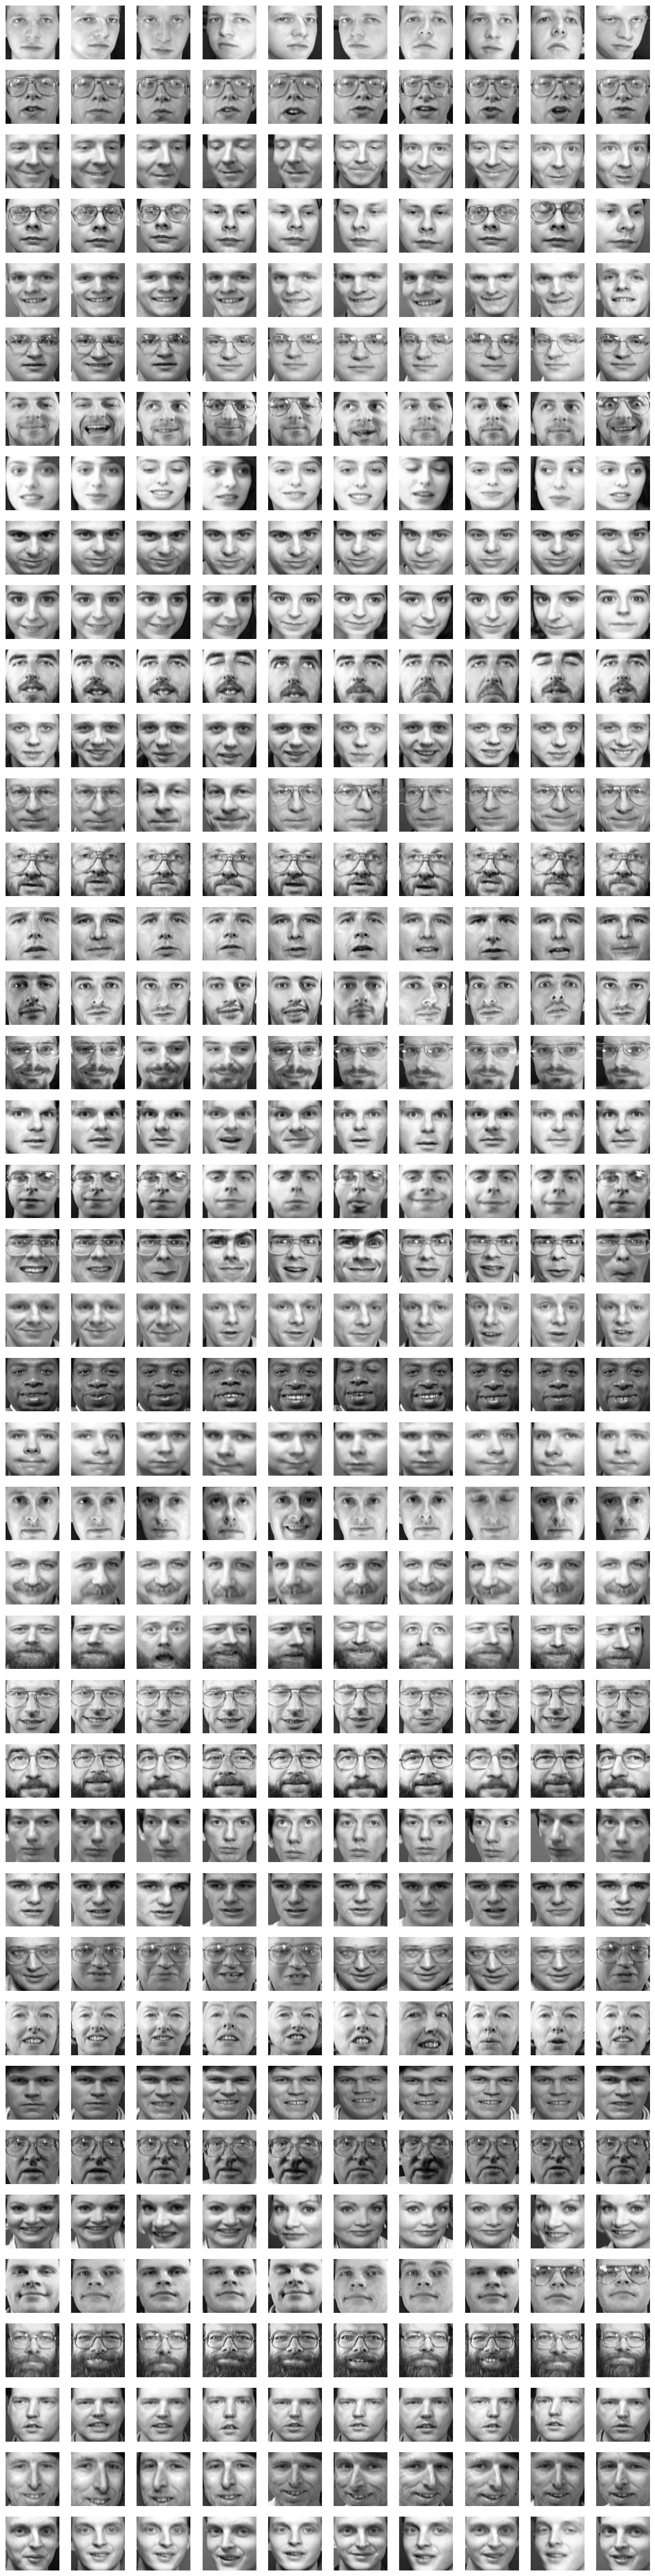

Number of faces in the persons_faces list: 400


In [75]:
# Display images in the persons_faces list
fig, axes = plt.subplots(40, 10, figsize=(15, 60))
for i in range(40):
    for j in range(10):
        axes[i, j].imshow(persons_faces[i][j], cmap='gray')
        axes[i, j].axis('off')

plt.show()
num_faces = sum(len(faces) for faces in persons_faces)
print("Number of faces in the persons_faces list:", num_faces)

#### images in the test faces

In [76]:
num_of_test_faces = len(test_faces)
print("Number of images in the test_faces list:", num_of_test_faces)

Number of images in the test_faces list: 36


#### How many images are in the list of faces of people not in the database

In [77]:
num_not_in_database = len(people_not_in_database)
print("Number of images in the people_not_in_database list:", num_not_in_database)

Number of images in the people_not_in_database list: 40


##### Image size


In [78]:
image_size = database[0][0].shape   
print("Image size:", image_size)

Image size: (64, 64)


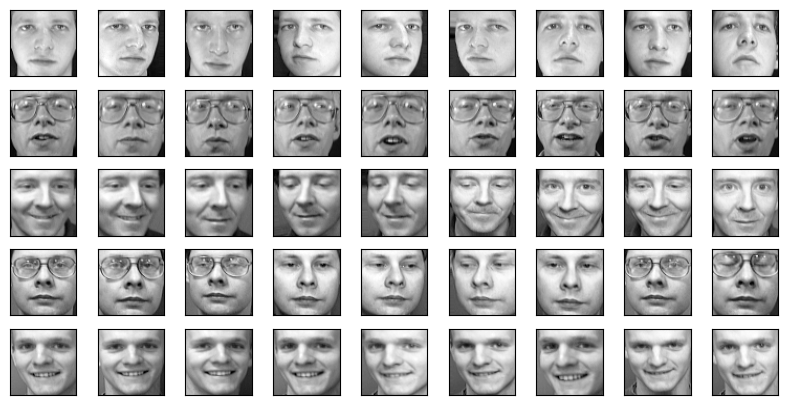

In [79]:
# display faces from the database of faces -> 9 faces of 5 different people
fig, axes = plt.subplots(5, 9, figsize=(10,5))
for i in range(5):
    for j in range(9):
        axes[i,j].imshow(database[i][j], cmap="gray")
        axes[i,j].set_xticks([]);
        axes[i,j].set_yticks([]);

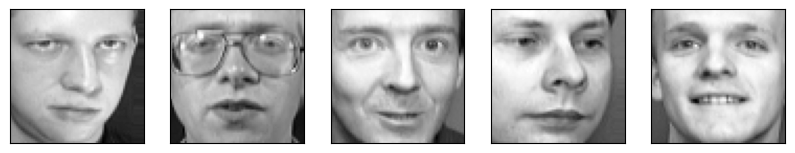

In [80]:
# display test faces for the first 5 people in the database
fig, axes = plt.subplots(1, 5, figsize=(10,5))
for i in range(5):
        axes[i].imshow(test_faces[i], cmap="gray")
        axes[i].set_xticks([]);
        axes[i].set_yticks([]);

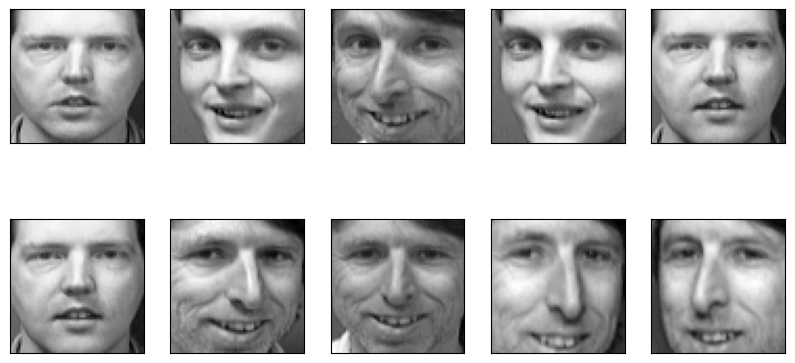

In [81]:
# display faces of 10 people who are not in the database
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i in range(10):
        j = random.randint(0,39)
        axes[i//5 , i%5].imshow(people_not_in_database[j], cmap="gray")
        axes[i//5 , i%5].set_xticks([]);
        axes[i//5 , i%5].set_yticks([]);

In [82]:
# Flatten each face in the database and stack them into a matrix T
T = np.array([face.flatten() for person in database for face in person])
print("Shape of matrix T:", T.shape)


Shape of matrix T: (324, 4096)


(4096,)
(64, 64)


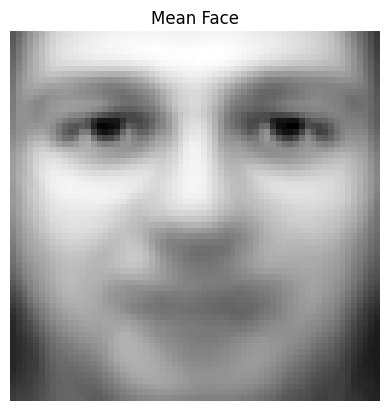

In [83]:
# Calculate the mean face
mean_face = np.mean(T, axis=0) #  treats the entire matrix as a single list of numbers
print(mean_face.shape)

# Reshape the mean face to the original image dimensions by using the image_size variable
mean_face_image = mean_face.reshape(image_size)
print(mean_face_image.shape)

# Display the mean face
plt.imshow(mean_face_image, cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

In [84]:
# Subtract the mean face from all faces in the database
T_centered = T - mean_face
    
# Print the shape of the centered matrix
print("Shape of centered matrix T_centered:", T_centered.shape)

Shape of centered matrix T_centered: (324, 4096)


In [85]:
# Calculate the covariance matrix
covariance_matrix = np.cov(T_centered, rowvar=False)

# Print the shape of the covariance matrix
print("Shape of covariance matrix:", covariance_matrix.shape)
covariance_matrix

Shape of covariance matrix: (4096, 4096)


array([[ 0.03252182,  0.0319414 ,  0.02836081, ..., -0.00844297,
        -0.00787676, -0.00575145],
       [ 0.0319414 ,  0.03530122,  0.03361429, ..., -0.01164312,
        -0.01073186, -0.00812144],
       [ 0.02836081,  0.03361429,  0.03723381, ..., -0.01503633,
        -0.01368845, -0.01087497],
       ...,
       [-0.00844297, -0.01164312, -0.01503633, ...,  0.03722309,
         0.03321925,  0.02946416],
       [-0.00787676, -0.01073186, -0.01368845, ...,  0.03321925,
         0.03527732,  0.03254291],
       [-0.00575145, -0.00812144, -0.01087497, ...,  0.02946416,
         0.03254291,  0.03369307]])

In [86]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenfaces = np.linalg.eig(covariance_matrix)

# Print the shape of the eigenfaces matrix
print("Shape of eigenfaces matrix:", eigenfaces.shape)
eigenfaces

Shape of eigenfaces matrix: (4096, 4096)


array([[-2.61405820e-03+0.j        ,  2.87979283e-02+0.j        ,
         8.82701496e-03+0.j        , ...,  3.85201028e-03+0.j        ,
        -4.27036462e-03+0.00296833j, -4.27036462e-03-0.00296833j],
       [-4.87186210e-03+0.j        ,  3.33767727e-02+0.j        ,
         8.12279797e-03+0.j        , ...,  9.79410839e-04+0.j        ,
        -4.18516744e-04+0.00028033j, -4.18516744e-04-0.00028033j],
       [-8.21832336e-03+0.j        ,  3.81229228e-02+0.j        ,
         5.88425338e-03+0.j        , ...,  8.74926747e-05+0.j        ,
        -7.51970896e-04+0.00026422j, -7.51970896e-04-0.00026422j],
       ...,
       [ 4.74637958e-03+0.j        , -3.22403362e-02+0.j        ,
        -1.62243004e-02+0.j        , ..., -1.18559131e-02+0.j        ,
         5.51426139e-03+0.004242j  ,  5.51426139e-03-0.004242j  ],
       [ 7.56200940e-03+0.j        , -2.86516780e-02+0.j        ,
        -1.44912150e-02+0.j        , ...,  4.67621698e-03+0.j        ,
        -8.81317512e-03-0.00552752j

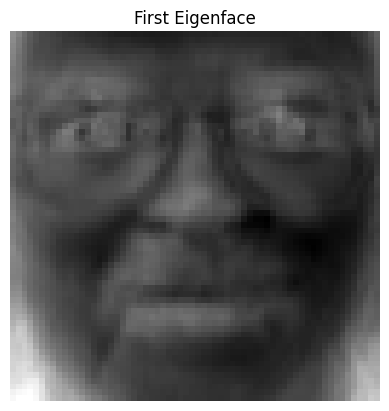

In [87]:
# Reshape the first eigenface to the original image dimensions
first_eigenface  = eigenfaces[:, 0].real.reshape(image_size)

# Display the first eigenface
plt.imshow(first_eigenface, cmap='gray')
plt.title('First Eigenface')
plt.axis('off')
plt.show()

using M transponse U

In [88]:
M_transponse = np.transpose(T_centered)
# U is the eigen vectors of the matrix M * M_transponse
M_M_transponse = np.dot(T_centered, M_transponse)
eigenvalues_MMT, eigenvectors_MMT = np.linalg.eig(M_M_transponse)

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues_MMT)[::-1]
eigenvalues_MMT = eigenvalues_MMT[sorted_indices]
eigenvectors_MMT = eigenvectors_MMT[:, sorted_indices]

# Calculate the eigenfaces V = M_transponse * eigenvectors
eigenfaces_MMT = np.dot(M_transponse, eigenvectors_MMT)
eigenfaces_MMT

array([[-1.9553629e-01, -1.7310152e+00, -3.8559711e-01, ...,
         7.7687297e-03,  4.6728700e-03,  5.9604645e-07],
       [-3.6442426e-01, -2.0062451e+00, -3.5483426e-01, ...,
        -2.1124983e-02,  1.6179064e-02,  1.1473894e-06],
       [-6.1474574e-01, -2.2915316e+00, -2.5704622e-01, ...,
        -3.6837989e-03,  4.1825473e-03,  3.1292439e-07],
       ...,
       [ 3.5503766e-01,  1.9379349e+00,  7.0873821e-01, ...,
        -3.1124614e-03,  8.5842889e-03,  0.0000000e+00],
       [ 5.6565231e-01,  1.7222242e+00,  6.3303053e-01, ...,
         4.2549167e-02,  7.5801648e-03,  1.8477440e-06],
       [ 5.1019144e-01,  1.5419848e+00,  5.9298956e-01, ...,
         7.3327430e-02,  2.4369657e-03, -3.8743019e-07]], dtype=float32)

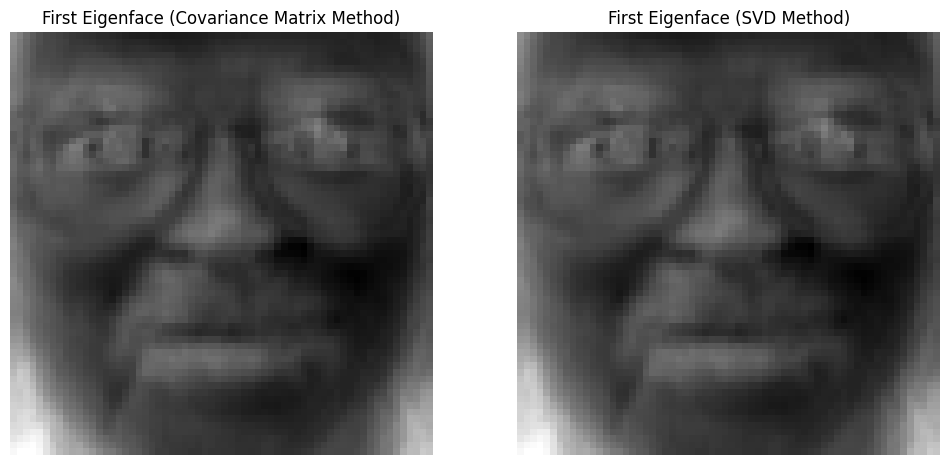

In [89]:
# Reshape the first eigenface obtained from the covariance matrix method
first_eigenface_cov = eigenfaces[:, 0].real.reshape(image_size)

# Reshape the first eigenface obtained from the SVD method ()
first_eigenface_svd = V_Transpose[0].reshape(image_size)

# Plot the eigenfaces
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first eigenface from the covariance matrix method
axes[0].imshow(first_eigenface_cov, cmap='gray')
axes[0].set_title('First Eigenface (Covariance Matrix Method)')
axes[0].axis('off')

# Display the first eigenface from the SVD method
axes[1].imshow(first_eigenface_svd, cmap='gray')
axes[1].set_title('First Eigenface (SVD Method)')
axes[1].axis('off')


plt.show()

In [90]:
# Calculate the cumulative variance explained by the eigenvalues
cumulative_variance = np.cumsum(S**2) / np.sum(S**2)

# Find the number of eigenfaces needed to capture at least 90% of the variance
num_eigenfaces = np.searchsorted(cumulative_variance, 0.90) + 1

print(f"Number of eigenfaces needed to capture at least 90% variance: {num_eigenfaces}")

# Select the top eigenfaces
top_eigenfaces = V_Transpose[:num_eigenfaces]

print(f"Shape of top eigenfaces: {top_eigenfaces.shape}")

Number of eigenfaces needed to capture at least 90% variance: 62
Shape of top eigenfaces: (62, 4096)


13. Visualizing the top 1o eigen faces

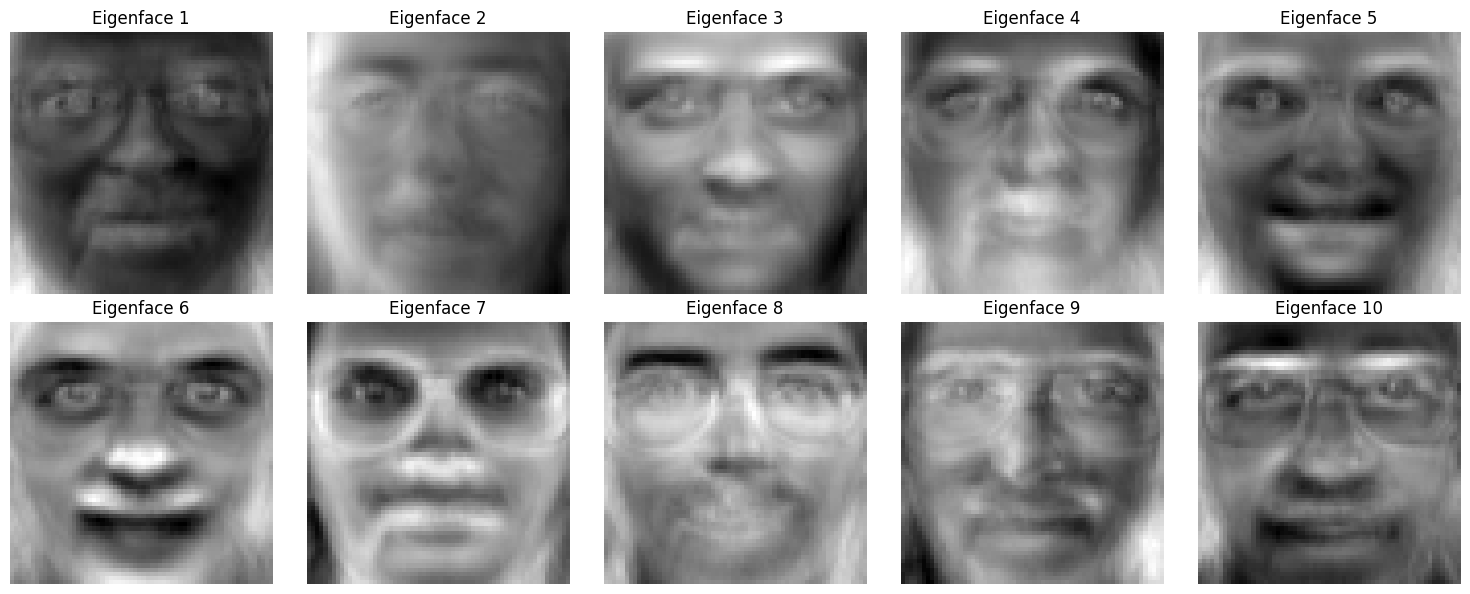

In [91]:
# Reshape the top 10 eigenfaces to the original image dimensions
top_10_eigenfaces = [eigenfaces[:, i].real.reshape(image_size) for i in range(10)]

# Plot the top 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(top_10_eigenfaces[i], cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

14. Given a matrix, A, whose columns are the top eigenfaces selected in (12), show that the projection matrix unto the column space of A is the identity matrix

In [92]:
eigenfaces_reshaped_column = top_eigenfaces.T
eigenfaces_reshaped_column.shape

(4096, 62)

In [93]:
# Compute the projection matrix P
A = eigenfaces_reshaped_column
P = A @ np.linalg.inv(A.T @ A) @ A.T

# Print the shape of the projection matrix
print("Shape of projection matrix P:", P.shape)

# Print the projection matrix
print("Projection matrix P:\n", P)

Shape of projection matrix P: (4096, 4096)
Projection matrix P:
 [[ 3.1528931e-02  2.9925555e-02  2.3874946e-02 ...  4.8322101e-05
  -1.6975886e-04  1.0539241e-03]
 [ 2.9925555e-02  3.1987101e-02  2.7768847e-02 ...  9.2354510e-04
   7.5862429e-04  1.9269886e-03]
 [ 2.3874946e-02  2.7768847e-02  2.7779767e-02 ...  1.1250293e-03
   1.8097998e-03  2.5044458e-03]
 ...
 [ 4.8321679e-05  9.2354498e-04  1.1250287e-03 ...  2.8783450e-02
   2.7416278e-02  2.4018327e-02]
 [-1.6975915e-04  7.5862417e-04  1.8097995e-03 ...  2.7416280e-02
   3.1559587e-02  3.0065536e-02]
 [ 1.0539247e-03  1.9269894e-03  2.5044465e-03 ...  2.4018327e-02
   3.0065538e-02  3.1311024e-02]]


In [94]:
# Project the centered images onto the eigenfaces subspace
coordinates = np.dot(T_centered, top_eigenfaces.T)

# Print the shape of the coordinates matrix
print("Shape of coordinates matrix:", coordinates.shape)

Shape of coordinates matrix: (324, 62)


Given a new face, x, and the mean image ¯x, show that the coordinate of x in the eigenfaces subspace
is given by AT (x − ¯x)

In [95]:
def project_new_face(x, mean_face, A):
    # Center the new face by subtracting the mean face
    x_centered = x.flatten() - mean_face
    
    # Project the centered face onto the eigenfaces subspace
    coordinates = np.dot(A.T, x_centered)
    
    return coordinates

# Example usage
new_face = test_faces[0]  # Assuming test_faces contains the new faces
coordinates = project_new_face(new_face, mean_face, eigenfaces_reshaped_column)

print("Coordinates of the new face in the eigenfaces subspace:", coordinates)

Coordinates of the new face in the eigenfaces subspace: [-1.7561886  -1.8969549  -5.2778664  -2.7733893   1.1122053  -2.8137345
 -2.395409   -1.911149   -1.120333    1.0759877   0.40979367 -0.13191937
  0.32234818 -1.6475186  -0.65025306  0.41630018  1.4501035   0.8624993
 -1.8568522   0.03193928  1.1326027  -0.4125468  -0.29336703 -0.23348182
 -0.6217948  -0.9995012   0.86415076 -0.2148374  -0.23411477  0.03145749
  1.2218843   0.0323341   0.08277967  0.17622963 -0.65720826  0.10702468
 -0.2881398   0.12024458 -0.1447544   0.8118369  -0.23644419  0.3946236
 -0.4695597  -0.03839464 -0.13576826 -0.71795034  0.55349874  0.17896934
  0.57741976 -0.47922823  0.21642381  0.23765281 -0.27603438  0.47849554
  0.3094513  -0.49058765 -0.2502879  -0.5056303  -0.66157615  0.44142509
 -0.60275495 -0.5087828 ]


In [96]:
def recognize_new_face(new_face_coordinates, database_coordinates, threshold):
    # Calculate the distances between the new face and all faces in the database
    distances = np.linalg.norm(database_coordinates - new_face_coordinates, axis=0)
    
    # Find the minimum distance
    min_distance = np.min(distances)
    
    # Determine if the new face is recognized
    is_recognized = min_distance < threshold
    
    return is_recognized, min_distance

# Example usage
threshold = 0.5  # Define your threshold value
is_recognized, min_distance = recognize_new_face(new_face_coordinates, coordinates, threshold)

print(f"Is the new face recognized? {'Yes' if is_recognized else 'No'}")
print(f"Minimum distance: {min_distance}")

Is the new face recognized? Yes
Minimum distance: 0.0


In [ ]:
from sklearn.metrics import accuracy_score

def project_face(face, mean_face, top_eigenfaces):
    # Flatten the face and subtract the mean face
    face_flattened = face.flatten()
    face_centered = face_flattened - mean_face
    
    # Project the centered face onto the eigenfaces subspace
    face_coordinates = np.dot(face_centered, top_eigenfaces.T)
    return face_coordinates

def recognize_face(test_face, mean_face, top_eigenfaces, coordinates, threshold):
    # Project the test face onto the eigenfaces subspace
    test_face_coordinates = project_face(test_face, mean_face, top_eigenfaces)
    
    # Compute the distances between the test face and all faces in the database
    distances = np.linalg.norm(coordinates - test_face_coordinates, axis=1)
    
    # Check if the minimum distance is below the threshold
    min_distance = np.min(distances)
    return min_distance < threshold

# Define a function to evaluate the accuracy of the face recognition system
def evaluate_system(test_faces, mean_face, top_eigenfaces, coordinates, threshold):
    predictions = []
    for test_face in test_faces:
        is_recognized = recognize_face(test_face, mean_face, top_eigenfaces, coordinates, threshold)
        predictions.append(is_recognized)
    
    # Assuming the ground truth is that all test faces should be recognized
    ground_truth = [True] * len(test_faces)
    accuracy = accuracy_score(ground_truth, predictions)
    return accuracy

# Find the optimal threshold
thresholds = np.linspace(0, 100, 1000)
best_threshold = 0
best_accuracy = 0

for threshold in thresholds:
    accuracy = evaluate_system(test_faces, mean_face, top_eigenfaces, coordinates, threshold)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
    if accuracy >= 0.80:
        break

print(f"Best threshold: {best_threshold}")
print(f"Accuracy: {best_accuracy}")

In [97]:
from sklearn.metrics import accuracy_score
print('done')
def project_face(face, mean_face, top_eigenfaces):
    # Flatten the face and subtract the mean face
    face_flattened = face.flatten()
    face_centered = face_flattened - mean_face
    
    # Project the centered face onto the eigenfaces subspace
    face_coordinates = np.dot(face_centered, top_eigenfaces.T)
    return face_coordinates

def recognize_face(test_face, mean_face, top_eigenfaces, coordinates, threshold):
    # Project the test face onto the eigenfaces subspace
    test_face_coordinates = project_face(test_face, mean_face, top_eigenfaces)
    
    # Compute the distances between the test face and all faces in the database
    distances = np.linalg.norm(coordinates - test_face_coordinates, axis=0)
    
    # Check if the minimum distance is below the threshold
    min_distance = np.min(distances)
    return min_distance < threshold

# Define a function to evaluate the accuracy of the face recognition system
def evaluate_system(test_faces, mean_face, top_eigenfaces, coordinates, threshold):
    predictions = []
    for test_face in test_faces:
        is_recognized = recognize_face(test_face, mean_face, top_eigenfaces, coordinates, threshold)
        predictions.append(is_recognized)
    
    # Assuming the ground truth is that all test faces should be recognized
    ground_truth = [True] * len(test_faces)
    accuracy = accuracy_score(ground_truth, predictions)
    return accuracy

# Find the optimal threshold
thresholds = np.linspace(0, 100, 1000)
best_threshold = 0
best_accuracy = 0

for threshold in thresholds:
    accuracy = evaluate_system(test_faces, mean_face, top_eigenfaces, coordinates, threshold)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
    if accuracy >= 0.80:
        break

print(f"Best threshold: {best_threshold}")
print(f"Accuracy: {best_accuracy}")

done
Best threshold: 14.214214214214214
Accuracy: 0.8055555555555556


17. For the obtained threshold, Evaluate the face recognition system’s performance using
the following metrics
(a) accuracy
(b) Precision
(c) Recall
(d) F1-score

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate the performance of the face recognition system
def evaluate_performance(test_faces, mean_face, top_eigenfaces, coordinates, threshold):
    predictions = []
    for test_face in test_faces:
        is_recognized = recognize_face(test_face, mean_face, top_eigenfaces, coordinates, threshold)
        predictions.append(is_recognized)
    
    # Assuming the ground truth is that all test faces should be recognized
    ground_truth = [True] * len(test_faces)
    
    accuracy = accuracy_score(ground_truth, predictions)
    precision = precision_score(ground_truth, predictions)
    recall = recall_score(ground_truth, predictions)
    f1 = f1_score(ground_truth, predictions)
    
    return accuracy, precision, recall, f1
# Evaluate the performance using the best threshold
accuracy, precision, recall, f1 = evaluate_performance(test_faces, mean_face, top_eigenfaces, coordinates, best_threshold)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8055555555555556
Precision: 1.0
Recall: 0.8055555555555556
F1-score: 0.8923076923076924


Conduct experiments to assess the impact of different parameters and settings on your
face recognition system. Consider factors like the number of eigenfaces.


Analyze and interpret the results, discussing the strengths and limitations of the Eigenfaces method
in your context.

# 4. Linear Regression

In [103]:
class LinearRegressorSVD():
    def __init__(self, A, b):
        # A is the input data and b is the output data
        ## Remember the equation Ax = b, where A is input data, our goal is to solve for the coeficients x
        b = np.array(b).reshape((len(b),1))
        self.A = A
        self.b = b
        # Setting an initial value for the coefficients matrix
        self.coefficients = np.empty((A.shape[1]))
        
    def train(self):
        "Computes the coefficients based on the dataset received by the model"
        #TODO: Train the model based on the data passed using SVD 
        self.coefficients = np.linalg.pinv(self.A) @ self.b
        return self.coefficients
        
    def predict(self, input):
        "Returns a prediction based on the learnt model and using the parameter passed"
        #TODO: Returns the prediction based on the learnt coefficient
        return np.dot(input, self.coefficients)
        

    def getError(self, preds, targets):
        # TODO compute and return the mean squared error of predicted inputs and actual label
        return mean_squared_error(targets, preds)
       
    


# SIZE OF THE DATASET

In [104]:
dataset = pd.read_csv('housing.csv', header=None)
# SIZE OF THE DATASET - ROWS x COLUMNS
print("Size of the dataset: ", dataset.shape)
# DISPLAY THE FIRST FEW ROWS OF THE DATASET
print("First few rows of the dataset: \n", dataset.head())

Size of the dataset:  (489, 4)
First few rows of the dataset: 
        0     1     2         3
0  6.575  4.98  15.3  504000.0
1  6.421  9.14  17.8  453600.0
2  7.185  4.03  17.8  728700.0
3  6.998  2.94  18.7  701400.0
4  7.147  5.33  18.7  760200.0


In [105]:
# In our dataset, the last column represent the y value that we are looking for.
# Separate the X from the y

# Retrieve the features into the X array, and the output to the y array
X = dataset[[0,1,2]].to_numpy()
y = dataset[3].to_numpy()

# Data processing.
# By analyzing the dataset, we realize that our y values are in the order of 100,000. This can lead to numerical instability
# so we first scale it. Note that our model will predict result that we will need to scale back in reallife.
y =  y/100000
len(y)

# Looking at the values in the features as well, their multiplication can also lead to numerical instability.
# In this case, we will apply what is called a min-max normalization. Read about it here https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)
#TODO: Apply min-max normalization on each of the columns of the X array

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.dtype

dtype('float64')

Coefficients:  [[ 9.50068071]
 [-1.29862203]
 [-0.56460349]]
Mean squared error for training data:  1.1849172161729788


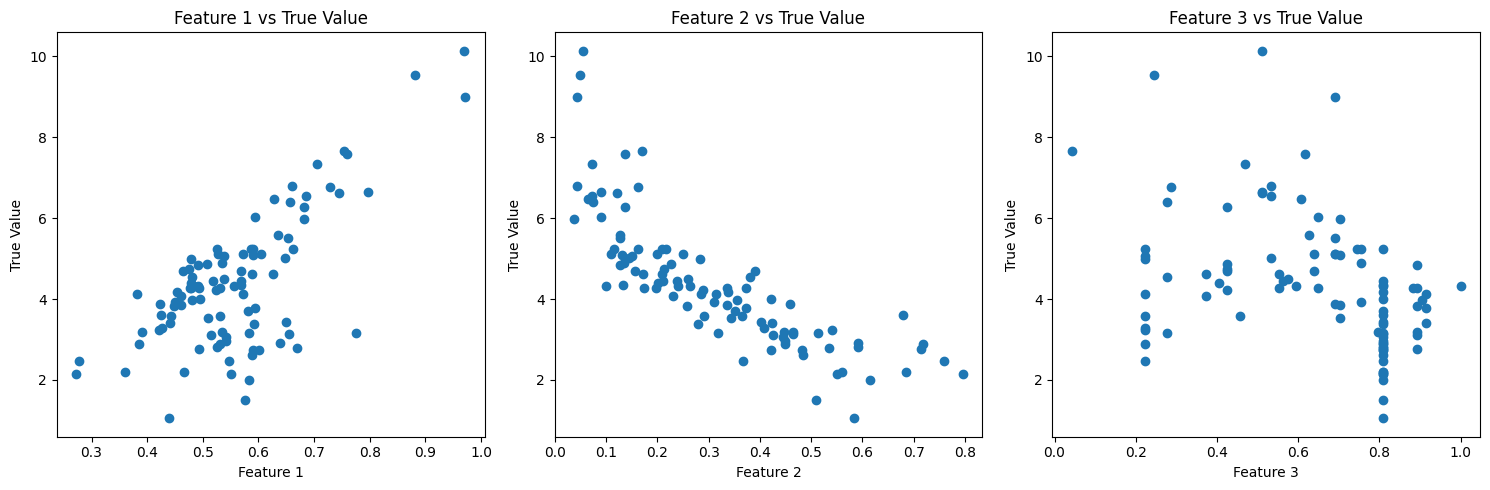

In [106]:
# In real-life training a model requires a training and testing dataset.
# In this stage, we will randomly generate the two datasets using 80% for the training dataset
# and 20% for the testing dataset. We use the train_test_split function for this

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Now that we have our datasets ready, we can start with the training process

lr = LinearRegressorSVD(X_train, y_train)
# TODO train the model
lr.train()

print("Coefficients: ", lr.coefficients)

##TODO print the mean square error for both training data
print("Mean squared error for training data: ", lr.getError(lr.predict(X_train), y_train))

# Now we can test our model
#TODO: Make a prediction using the test dataset
predictions = lr.predict(X_test)

# Visualization
#TODO: Create three plots. Using the test dataset, do a scatter plot of the i-th feature (X_i) against the true value y.
#Your code goes here

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot each feature against the true value y
for i in range(3):
    axs[i].scatter(X_test[:, i], y_test)
    axs[i].set_title(f'Feature {i+1} vs True Value')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('True Value')

# Display the plots
plt.tight_layout()
plt.show()

#TODO: Make a scattered plot of the predicted values, on the same figure, plot the actuall values.
